In [1]:
import pandas as pd
import plotly.express as px

In [2]:
# configurar casas decimais
pd.set_option('display.precision',2)

# modificar formaração 
pd.set_option('float_format', '{:,.2f}'.format)

# voltra formatação padrão
# pd.reset_option('^display.', silent=True)

LENDO OS DADOS

In [3]:
# df = pd.read_excel('BIX_TECNOLOGIA_DF.xlsx', index_col=0) # teste1
df = pd.read_excel('BIX.xlsx', index_col=0) # teste2
display(df)

,VendasID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,City,State,DateOfBirth,Sex,Product,Size
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,0.08,249.20,1,4,2018-12-10,Curitiba,PR,1985-06-28,Homem,Tempestade,G
1,7ab64f42a8f9ab290e920eed320d7e60,002552c0663708129c0019cc97552d7d3,14002,0.10,249.20,1,1,2019-03-28,Florianópolis,SC,1987-01-10,Homem,Tempestade,G
2,d53709cd2507666542fcf8f6120b99f0,002552c0663708129c0019cc97552d7d3,14004,0.08,249.20,1,2,2019-08-01,Rio de Janeiro,RJ,1983-11-25,Mulher,Tempestade,G
3,418f45a2544c9ab8f50c4d6843642a98,002552c0663708129c0019cc97552d7d3,14008,0.08,249.20,1,7,2019-06-04,São Paulo,SP,1971-12-07,Homem,Tempestade,G
4,d56ddc412e7725060f044aa15d7073d3,002552c0663708129c0019cc97552d7d3,14020,0.08,249.20,1,2,2019-08-01,Rio de Janeiro,RJ,1961-08-08,Homem,Tempestade,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32748,f6dfb291afbbd784e350772d9369dd66,001795ec6f1b187d37335e1c4704762e1,28434,0.10,148.40,1,4,2018-10-30,Curitiba,PR,1981-06-20,Homem,Mulher-Maravilha,P
32749,38f3f9b07a8b12e3b5b699ea7297932e,001795ec6f1b187d37335e1c4704762e1,28468,0.08,148.40,1,7,2019-08-10,São Paulo,SP,1989-06-02,Mulher,Mulher-Maravilha,P
32750,c9ad6eb320a7ed6a0a66b48ed02429b3,001795ec6f1b187d37335e1c4704762e1,28470,0.08,148.40,1,4,2018-08-09,Curitiba,PR,1999-07-29,Homem,Mulher-Maravilha,P
32751,99d631c1611f52df83ba482fecde677a,001795ec6f1b187d37335e1c4704762e1,28555,0.08,148.40,1,7,2019-08-17,São Paulo,SP,1986-11-22,Homem,Mulher-Maravilha,P


In [4]:
df['fat'] = df['Quantity'] * df['UnitPrice']

In [5]:
df['fat'].describe()

count   32,753.00
mean       234.75
std        133.33
min        114.80
25%        161.00
50%        204.40
75%        233.80
max      1,372.00
Name: fat, dtype: float64

In [6]:
df.nunique().sort_values()

Discount           2
Sex                2
Quantity           3
Size               4
StoreID            7
State             18
UnitPrice         21
Product           24
fat               56
ProductID         73
City             123
Date             690
DateOfBirth     8896
ClientID       13650
VendasID       32753
dtype: int64

In [7]:
qtde = df.groupby(['Product', 'ProductID']).sum().sort_values('Quantity', ascending=False)
display(qtde)

,,ClientID,Discount,UnitPrice,Quantity,StoreID,fat
Product,ProductID,,,,,,
Bazinga,002ec297b1b00fb9dde7ee6ac24b67713,20371449,89.62,"210,974.40",1020,3462,"222,768.00"
Iron Man,002d4ea7c04739c130bb74d7e7cd16943,20604042,89.22,"202,230.00",1018,3438,"213,780.00"
Deadpool,0009406fd7479715e4bef61dd91f24623,19679425,85.76,"236,199.60",998,3350,"254,290.40"
Flash,0011c512eb256aa0dbbb544d8dffcf6e3,19919913,87.74,"192,136.00",996,3582,"203,582.40"
Capitã Marvel,001c5d71ac6ad696d22315953758fa043,20025234,88.38,"214,099.20",996,3710,"225,892.80"
...,...,...,...,...,...,...,...
Darth Vader,002c6dab60557c48cfd6c2222ef7fd762,4313229,19.12,"30,422.00",216,790,"32,054.40"
Naruto,00210e41887c2a8ef9f791ebc780cc362,4334488,19.02,"82,824.00",214,756,"86,884.00"
Tempestade,002552c0663708129c0019cc97552d7d2,4247812,18.50,"49,840.00",214,765,"53,328.80"


In [8]:
df['year'] = df['Date'].dt.strftime('%Y')
df['month'] = df['Date'].dt.strftime('%m')
display(df)

,VendasID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,City,State,DateOfBirth,Sex,Product,Size,fat,year,month
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,0.08,249.20,1,4,2018-12-10,Curitiba,PR,1985-06-28,Homem,Tempestade,G,249.20,2018,12
1,7ab64f42a8f9ab290e920eed320d7e60,002552c0663708129c0019cc97552d7d3,14002,0.10,249.20,1,1,2019-03-28,Florianópolis,SC,1987-01-10,Homem,Tempestade,G,249.20,2019,03
2,d53709cd2507666542fcf8f6120b99f0,002552c0663708129c0019cc97552d7d3,14004,0.08,249.20,1,2,2019-08-01,Rio de Janeiro,RJ,1983-11-25,Mulher,Tempestade,G,249.20,2019,08
3,418f45a2544c9ab8f50c4d6843642a98,002552c0663708129c0019cc97552d7d3,14008,0.08,249.20,1,7,2019-06-04,São Paulo,SP,1971-12-07,Homem,Tempestade,G,249.20,2019,06
4,d56ddc412e7725060f044aa15d7073d3,002552c0663708129c0019cc97552d7d3,14020,0.08,249.20,1,2,2019-08-01,Rio de Janeiro,RJ,1961-08-08,Homem,Tempestade,G,249.20,2019,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32748,f6dfb291afbbd784e350772d9369dd66,001795ec6f1b187d37335e1c4704762e1,28434,0.10,148.40,1,4,2018-10-30,Curitiba,PR,1981-06-20,Homem,Mulher-Maravilha,P,148.40,2018,10
32749,38f3f9b07a8b12e3b5b699ea7297932e,001795ec6f1b187d37335e1c4704762e1,28468,0.08,148.40,1,7,2019-08-10,São Paulo,SP,1989-06-02,Mulher,Mulher-Maravilha,P,148.40,2019,08
32750,c9ad6eb320a7ed6a0a66b48ed02429b3,001795ec6f1b187d37335e1c4704762e1,28470,0.08,148.40,1,4,2018-08-09,Curitiba,PR,1999-07-29,Homem,Mulher-Maravilha,P,148.40,2018,08
32751,99d631c1611f52df83ba482fecde677a,001795ec6f1b187d37335e1c4704762e1,28555,0.08,148.40,1,7,2019-08-17,São Paulo,SP,1986-11-22,Homem,Mulher-Maravilha,P,148.40,2019,08


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32753 entries, 0 to 32752
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   VendasID     32753 non-null  object        
 1   ProductID    32753 non-null  object        
 2   ClientID     32753 non-null  int64         
 3   Discount     32753 non-null  float64       
 4   UnitPrice    32753 non-null  float64       
 5   Quantity     32753 non-null  int64         
 6   StoreID      32753 non-null  int64         
 7   Date         32753 non-null  datetime64[ns]
 8   City         32753 non-null  object        
 9   State        32753 non-null  object        
 10  DateOfBirth  32753 non-null  datetime64[ns]
 11  Sex          32753 non-null  object        
 12  Product      32753 non-null  object        
 13  Size         32753 non-null  object        
 14  fat          32753 non-null  float64       
 15  year         32753 non-null  object        
 16  mont

In [10]:
year = df.loc[df['year'] == '2019', ['Product', 'UnitPrice', 'Quantity', 'Size', 'year', 'month', 'fat', 'State', 'City']]

<AxesSubplot:xlabel='month'>

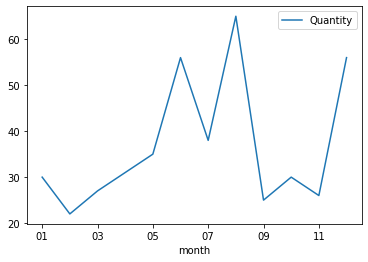

In [11]:
iron = year.loc[year['Product'] == 'Iron Man', ['Product', 'Quantity', 'month', 'Size']]
iron = iron.loc[iron['Size'] == 'G', ['Product', 'Quantity', 'month', 'Size']]
iron = iron.groupby('month').sum()
iron.plot()

In [12]:
display(year)

,Product,UnitPrice,Quantity,Size,year,month,fat,State,City
1,Tempestade,249.20,1,G,2019,03,249.20,SC,Florianópolis
2,Tempestade,249.20,1,G,2019,08,249.20,RJ,Rio de Janeiro
3,Tempestade,249.20,1,G,2019,06,249.20,SP,São Paulo
4,Tempestade,249.20,1,G,2019,08,249.20,RJ,Rio de Janeiro
5,Tempestade,249.20,1,G,2019,07,249.20,RS,Porto Alegre
...,...,...,...,...,...,...,...,...,...
32736,Mulher-Maravilha,148.40,1,P,2019,12,148.40,SC,Florianópolis
32743,Mulher-Maravilha,148.40,1,P,2019,12,148.40,RS,Porto Alegre
32745,Mulher-Maravilha,148.40,1,P,2019,08,148.40,SC,Florianópolis
32749,Mulher-Maravilha,148.40,1,P,2019,08,148.40,SP,São Paulo


In [13]:
faturamento = year.groupby(['year', 'month']).sum().sort_values('month', ascending=True)
display(faturamento)

UnitPrice  Quantity        fat
year month                                
2019 01    224,638.40      1057 234,277.40
     02    178,669.40       834 187,203.80
     03    303,454.20      1186 316,759.80
     04    277,320.40      1078 286,636.00
     05    300,983.20      1165 314,837.60
     06    471,296.00      1989 494,282.60
     07    263,993.80      1028 269,731.00
     08    468,384.00      2035 495,861.80
     09    269,924.20      1067 285,343.80
     10    235,551.40       977 251,095.60
     11    266,163.80      1069 276,053.40
     12    455,411.60      1927 478,808.40

In [14]:
faturamento['fat'].describe()

count        12.00
mean    324,240.93
std     105,678.21
min     187,203.80
25%     265,072.15
50%     285,989.90
75%     357,271.95
max     495,861.80
Name: fat, dtype: float64

In [15]:
df

,VendasID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,City,State,DateOfBirth,Sex,Product,Size,fat,year,month
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,0.08,249.20,1,4,2018-12-10,Curitiba,PR,1985-06-28,Homem,Tempestade,G,249.20,2018,12
1,7ab64f42a8f9ab290e920eed320d7e60,002552c0663708129c0019cc97552d7d3,14002,0.10,249.20,1,1,2019-03-28,Florianópolis,SC,1987-01-10,Homem,Tempestade,G,249.20,2019,03
2,d53709cd2507666542fcf8f6120b99f0,002552c0663708129c0019cc97552d7d3,14004,0.08,249.20,1,2,2019-08-01,Rio de Janeiro,RJ,1983-11-25,Mulher,Tempestade,G,249.20,2019,08
3,418f45a2544c9ab8f50c4d6843642a98,002552c0663708129c0019cc97552d7d3,14008,0.08,249.20,1,7,2019-06-04,São Paulo,SP,1971-12-07,Homem,Tempestade,G,249.20,2019,06
4,d56ddc412e7725060f044aa15d7073d3,002552c0663708129c0019cc97552d7d3,14020,0.08,249.20,1,2,2019-08-01,Rio de Janeiro,RJ,1961-08-08,Homem,Tempestade,G,249.20,2019,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32748,f6dfb291afbbd784e350772d9369dd66,001795ec6f1b187d37335e1c4704762e1,28434,0.10,148.40,1,4,2018-10-30,Curitiba,PR,1981-06-20,Homem,Mulher-Maravilha,P,148.40,2018,10
32749,38f3f9b07a8b12e3b5b699ea7297932e,001795ec6f1b187d37335e1c4704762e1,28468,0.08,148.40,1,7,2019-08-10,São Paulo,SP,1989-06-02,Mulher,Mulher-Maravilha,P,148.40,2019,08
32750,c9ad6eb320a7ed6a0a66b48ed02429b3,001795ec6f1b187d37335e1c4704762e1,28470,0.08,148.40,1,4,2018-08-09,Curitiba,PR,1999-07-29,Homem,Mulher-Maravilha,P,148.40,2018,08
32751,99d631c1611f52df83ba482fecde677a,001795ec6f1b187d37335e1c4704762e1,28555,0.08,148.40,1,7,2019-08-17,São Paulo,SP,1986-11-22,Homem,Mulher-Maravilha,P,148.40,2019,08


In [16]:
geral = year.groupby(['State', 'City']).sum().sort_values('fat', ascending=False)
geral

,,UnitPrice,Quantity,fat
State,City,,,
SC,Florianópolis,"941,383.80",3913,"988,316.00"
RJ,Rio de Janeiro,"752,977.40",3146,"789,054.00"
RS,Porto Alegre,"699,440.00",2918,"731,313.80"
PR,Curitiba,"586,675.60",2386,"613,893.00"
SP,São Paulo,"370,277.60",1552,"389,670.40"
...,...,...,...,...
GO,Alto paraiso de goias,162.40,1,162.40
SP,Braganca paulista,156.80,1,156.80
RJ,Niteroi,134.40,1,134.40


In [17]:
t = df.groupby(['State']).sum().sort_values('State')
t

,ClientID,Discount,UnitPrice,Quantity,StoreID,fat
State,,,,,,
AC,187624,0.74,"2,032.80",8,176,"2,032.80"
BA,108768,0.56,"1,230.60",6,132,"1,230.60"
BH,18730547,77.22,"187,027.40",886,18304,"198,767.80"
ES,375909,1.74,"4,235.00",19,418,"4,235.00"
GO,88824,0.56,"1,080.80",6,132,"1,080.80"
MA,107446,0.54,"1,527.40",6,132,"1,527.40"
MG,41739816,171.76,"409,708.60",1956,16605,"433,844.60"
MS,78192,0.38,862.40,4,88,862.40
MT,421431,1.68,"3,801.00",19,396,"4,034.80"


In [18]:
display(df['fat'].sum())

7688893.800000001